# WEEK 03
# Encounter 08 - Visualization Best Practices
# Project Challenge - Make an animated plot

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
gapminder = pd.read_csv('../data/gapminder_total.csv')
gapminder.head()

,country,year,life expectancy,continent,population,fertility
0,Afghanistan,1950.0,26.85,Asia,7752118.0,7.67
1,Afghanistan,1951.0,27.13,Asia,7839426.0,7.67
2,Afghanistan,1952.0,27.67,Asia,7934798.0,7.67
3,Afghanistan,1953.0,28.19,Asia,8038312.0,7.67
4,Afghanistan,1954.0,28.73,Asia,8150037.0,7.67


In [44]:
# converting 'year' and 'population' datatype to 'Int64'
gapminder['year'] = gapminder['year'].astype('Int64')
#gapminder['population'] = gapminder['population'].astype('Int64')

In [ ]:
### Visualize data for one particular year

In [45]:
# filtering out 2015 data using boolean mask
gapminder_2015 = gapminder[gapminder['year'] == 2015]
gapminder_2015.head()

,country,year,life expectancy,continent,population,fertility
65,Afghanistan,2015,53.8,Asia,32526562.0,4.47
132,Albania,2015,78.0,Europe,2896679.0,1.78
199,Algeria,2015,76.4,Africa,39666519.0,2.71
266,Angola,2015,59.6,Africa,25021974.0,5.65
333,Antigua and Barbuda,2015,76.4,North America,91818.0,2.06


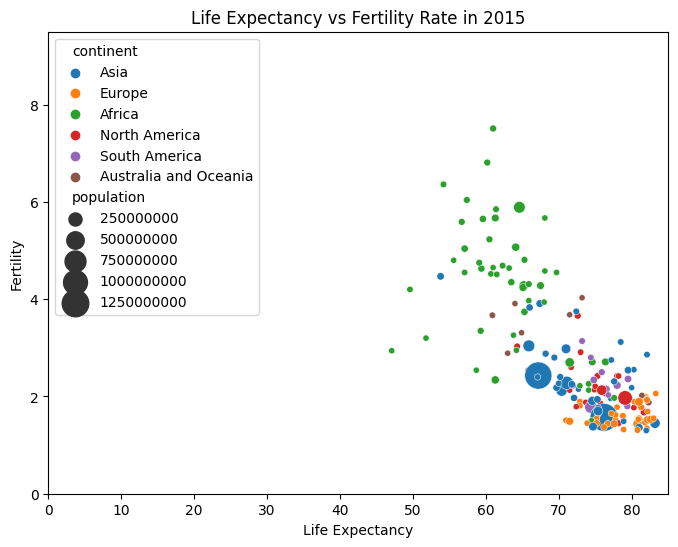

In [38]:
# ploting the data the same as in "Encounter 07 - Project Challenge"

plt.figure(figsize=(8, 6))

sns.scatterplot(x='life expectancy', y='fertility', 
                data=gapminder_2015,
                size='population',
                sizes=(20, 400),
                hue='continent'
               );

plt.axis([0, 85, 0, 9.5])
plt.title('Life Expectancy vs Fertility Rate in 2015')
plt.ylabel('Fertility')
plt.xlabel('Life Expectancy')

# saving the image as png
plt.savefig('../images/plot_fig_2015.png')
plt.savefig('../docs/plot_fig_2015.pdf')

## Project Challenge: Make an animated plot

First, improve your plot with the new features you learned during the encounter:

   1. Rotate the x-ticks by 45 degrees
   2. Color each point according to continent
   3. Annotate 2 to 4 countries
   4. Add grid-lines
   5. Adjust the opacity of the points
   6. Try out different plotting themes

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

In [54]:
gapminder_2015.describe()
#gapminder_2015.describe(include='O')

,year,life expectancy,population,fertility
count,233.0,208.00000,2.310000e+02,199.000000
mean,2015.0,72.32101,3.171457e+07,2.744523
std,0.0,7.90202,1.297556e+08,1.332827
min,2015.0,47.10000,8.000000e+02,1.130000
25%,2015.0,67.05000,4.209290e+05,1.785000
50%,2015.0,74.40000,5.373502e+06,2.230000
75%,2015.0,78.50000,1.900687e+07,3.495000
max,2015.0,84.80000,1.376049e+09,7.510000


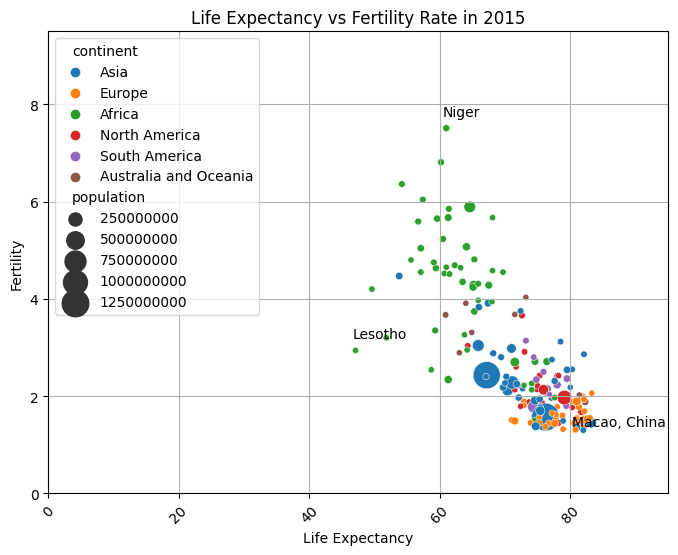

In [74]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='life expectancy', y='fertility', 
                data=gapminder_2015,
                size='population',
                sizes=(20, 400),
                hue='continent' # Color each point according to continent
               );

# Rotate the x-ticks by 45 degrees
plt.xticks(rotation=45)

# Annotate 2 to 4 countries
# country with min fertility
year_fertility_min = gapminder_2015['fertility'].min() # 7.51
plt.annotate(gapminder_2015[gapminder_2015['fertility']==year_fertility_min]['country'].item(),
             (gapminder_2015[gapminder_2015['fertility']==year_fertility_min]['life expectancy']-0.50, 
              gapminder_2015[gapminder_2015['fertility']==year_fertility_min]['fertility']+0.25));

# country with max fertility
year_fertility_max = gapminder_2015['fertility'].max() # 7.51
plt.annotate(gapminder_2015[gapminder_2015['fertility']==year_fertility_max]['country'].item(),
             (gapminder_2015[gapminder_2015['fertility']==year_fertility_max]['life expectancy']-0.50, 
              gapminder_2015[gapminder_2015['fertility']==year_fertility_max]['fertility']+0.25));

# country with min life expectancy
year_life_exp_min = gapminder_2015['life expectancy'].min() # 47.1
plt.annotate(gapminder_2015[gapminder_2015['life expectancy']==year_life_exp_min]['country'].item(),
             (gapminder_2015[gapminder_2015['life expectancy']==year_life_exp_min]['life expectancy']-0.50, 
              gapminder_2015[gapminder_2015['life expectancy']==year_life_exp_min]['fertility']+0.25));

# country with max life expectancy
year_life_exp_max = gapminder_2015['life expectancy'].max() # 84.8
plt.annotate(gapminder_2015[gapminder_2015['life expectancy']==year_life_exp_max]['country'].item(),
             (gapminder_2015[gapminder_2015['life expectancy']==year_life_exp_max]['life expectancy']-0.50, 
              gapminder_2015[gapminder_2015['life expectancy']==year_life_exp_max]['fertility']+0.25));

# Add grid-lines
plt.grid()

# TBD: "Try out different plotting themes" ???

# moving the legend out of plot area
# WARNING: leads to cuting saved image
# plt.legend(bbox_to_anchor=(1.4,1), frameon = False)
#labels_lst = plt.legend().labels

plt.axis([0, 95, 0, 9.5])
plt.title('Life Expectancy vs Fertility Rate in 2015')
plt.ylabel('Fertility')
plt.xlabel('Life Expectancy')

# saving the image as png
plt.savefig('../images/plot_fig_2015.png')
#plt.savefig('../docs/plot_fig_2015.pdf')


# closing current plot
plt.close()

